<a href="https://colab.research.google.com/github/TheRyidGilani/DS8015/blob/main/DS8015_Project_Group_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DS8015 Final Project**
**Prediction of Microsoft's Closing Stock Price in 2018**

## **Introduction**

* In this project, our objective is to utilize machine learning techniques to forecast the closing price of Microsoft stock for the year 2018. Microsoft is a prominent company within the S&P 500 Information Technology sector.

## **Data Preparation**

* To begin, import all the necessary libraries.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

* Next, connect to Google Drive.

In [ ]:
# Connect to Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* The csv file containing the Microsoft data can now be accessed and stored into a dataframe, using the pandas library.

In [ ]:
# Store Dataframe in variable called "dataframe"
dataframe = pd.read_csv("/content/drive/Shareddrives/DS8015 Project/Dataset/MSFT_data.csv")

In [ ]:
# Display first 5 lines to check import.
dataframe.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


## **Exploratory Data Analysis**

* To begin, an analysis of the features will be conducted, examining their relationship with the closing price of Microsoft's stock.

* This analysis will assist in identifying the most influential features for accurately predicting the closing price.

In [ ]:
#Display number of rows and columns.
dataframe.shape

(1259, 7)

In [ ]:
#Display Datatype of each column.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [ ]:
#Check for null values in each column, and display the sum of null values in each column.
dataframe.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

The above outputs indicate that the dataset contains 1259 entries across 7 columns.

The columns include 'date', 'open', 'high', 'low', 'close', 'volume', and 'Name'.

* The 'date' and 'Name' columns are of type object, while the rest are numerical, with 'volume' being an integer and the others being floating-point numbers.

* There are no missing values in any of the columns.

To further our understanding of this data, we will use the Pandas method to provide statistics for each column in the dataset.

In [ ]:
dataframe.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,95.140000,96.070000,93.720000,95.010000,2.483542e+08


## **EDA Visualization**

* The closing price of a financial asset represents its value at the end of a trading session and is a crucial indicator of market sentiment and investor behavior.

* Plotting the closing prices against their respective dates aims to uncover patterns, trends, and potential insights into the performance of the asset.

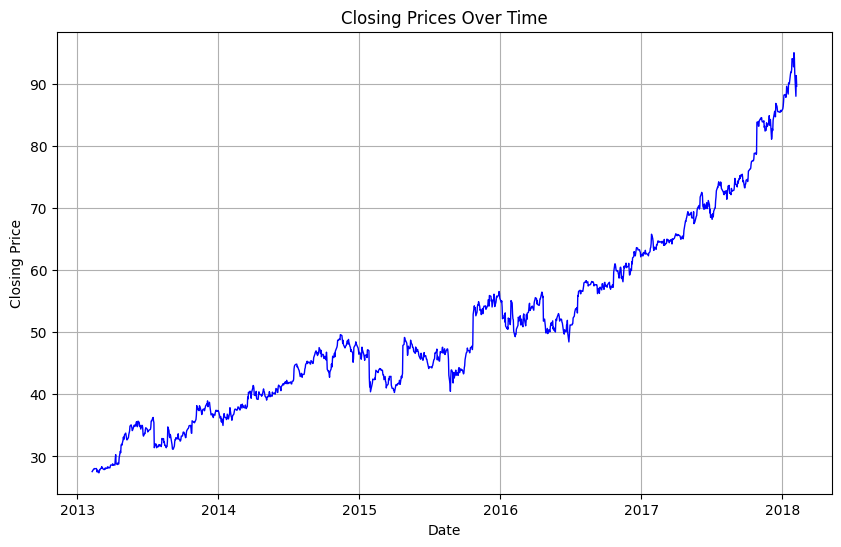

In [ ]:
# Convert the 'date' column to datetime
dataframe['date'] = pd.to_datetime(dataframe['date'])

# Plot Closing Price Over Time
plt.figure(figsize=(10, 6))
plt.plot(dataframe['date'], dataframe['close'], color='blue', linewidth=1)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

* It appears that Microsoft investors experienced significant gains over the past five years, provided they held onto their investments.

* The stock more than doubled in value during this 5-year year period!

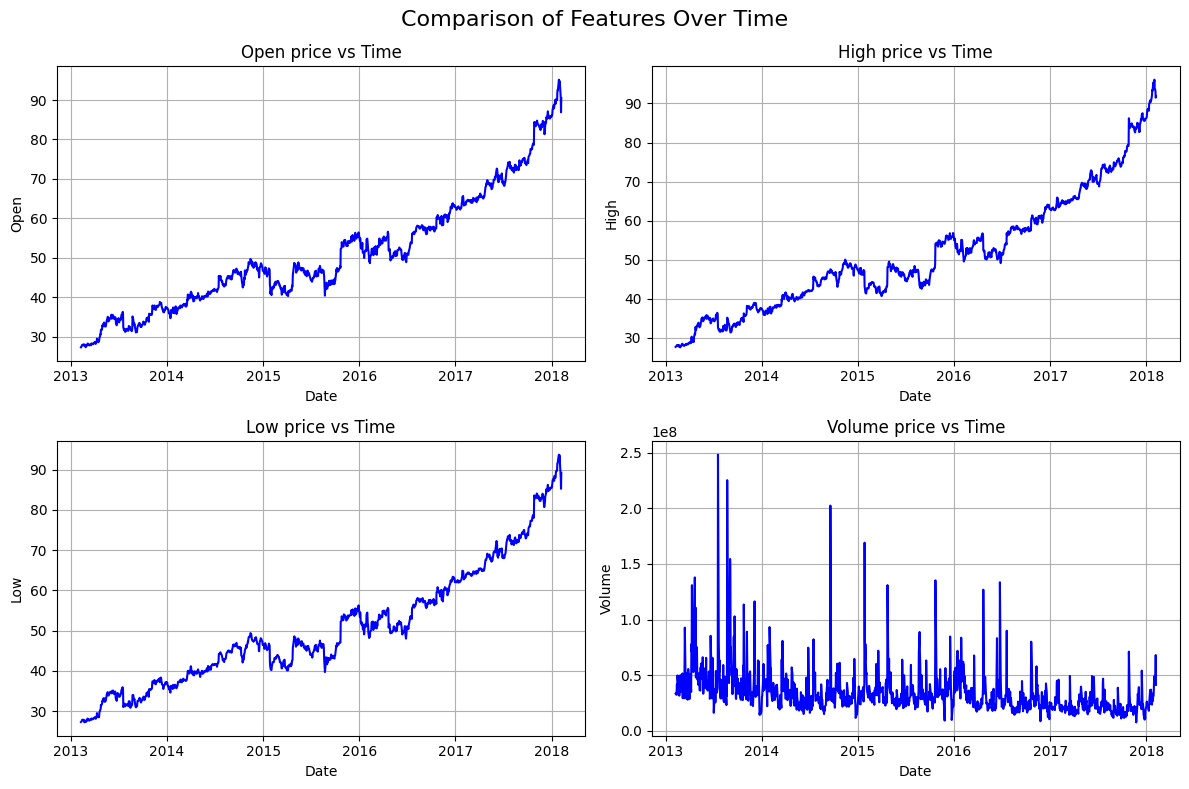

In [ ]:
# Define Features to Compare in the Visualization
features_to_compare = ['open', 'high', 'low', 'volume']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Comparison of Features Over Time', fontsize=16)

# Plot each feature in a separate subplot
for i, feature in enumerate(features_to_compare):
    row = i // 2
    col = i % 2
    axes[row, col].plot(dataframe['date'], dataframe[feature], label=feature, color='blue')
    axes[row, col].set_title(feature.capitalize() + " price vs Time")
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel(feature.capitalize())
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()

* Above are the various numerical features being plotted over time. This comparative analysis aims to illustrate the temporal behavior of each feature throughout the dataset's timeline.

* Interestingly, the plots for the high, low, and open prices closely resemble the pattern of the closing prices, indicating a strong similarity in their trends over time.

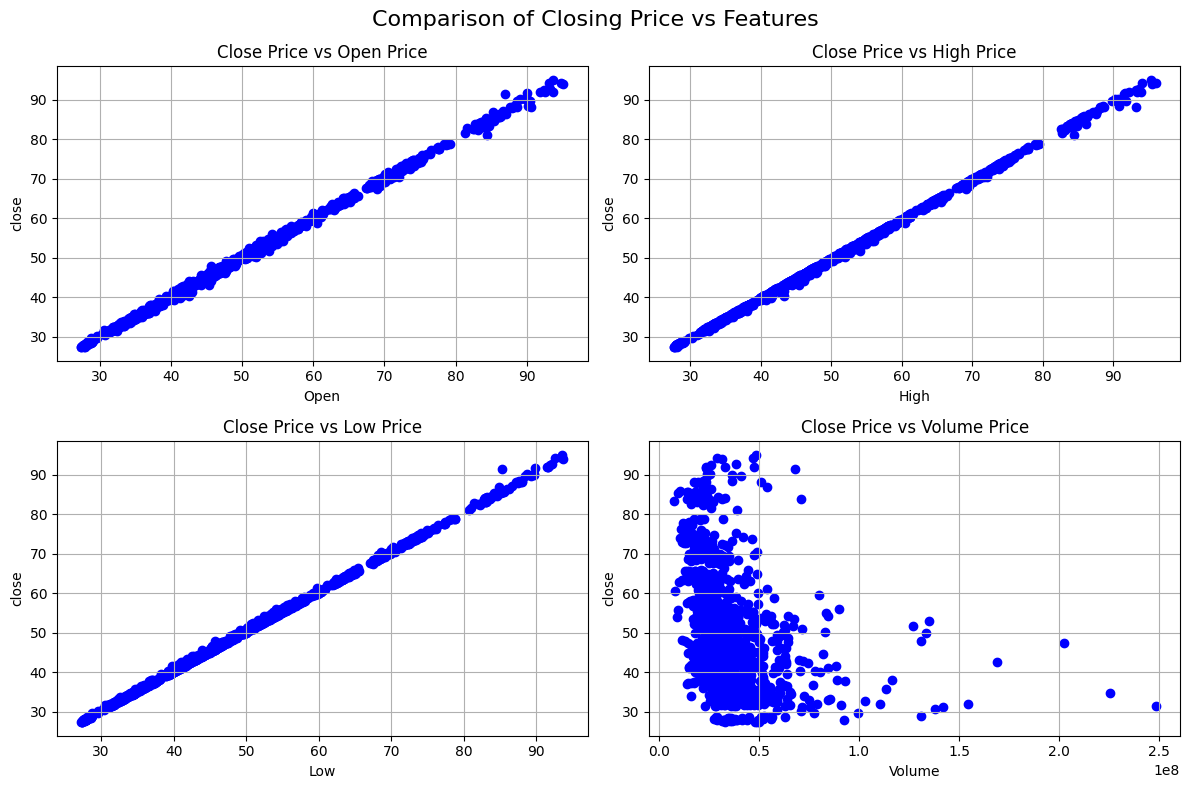

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Comparison of Closing Price vs Features', fontsize=16)

# Plot each feature in a separate subplot
for i, feature in enumerate(features_to_compare):
    row = i // 2
    col = i % 2
    axes[row, col].scatter(dataframe[feature], dataframe['close'], label=feature, color='blue')
    axes[row, col].set_title("Close Price vs " + feature.capitalize() + " Price")
    axes[row, col].set_ylabel('close')
    axes[row, col].set_xlabel(feature.capitalize())
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()

* The scatter plot comparing the open price against the closing price reveals a distinct linear relationship between these two variables. This relationship is also evident in the high and low prices. Such consistency suggests a strong correlation and potential predictive power of these features in forecasting the closing price of the financial asset.

* On the flipside, when the closing price is low, trading volume tends to be high; and when the closing price is high, trading volume decreases. This inverse relationship reflects the interplay of supply and demand dynamics in the market, providing insights into market sentiment and investor behavior.

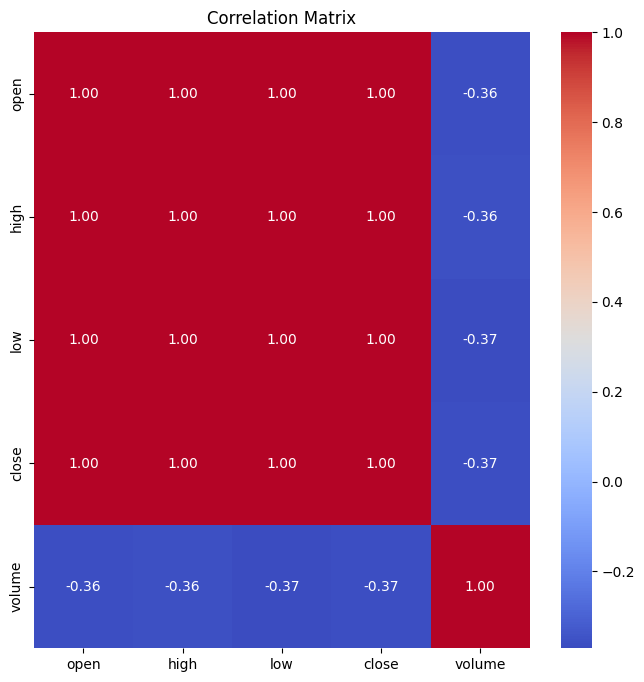

In [ ]:
# Exclude non-numeric columns (e.g., 'date' and 'Name') before calculating the correlation matrix
numeric_dataframe = dataframe.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_dataframe.corr()

# Plot heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

* The heatmap generated above displays the correlation of all features against each other.

* The only relevant column is second from the right, which illustrates the correlation of the features to the closing price (Target).

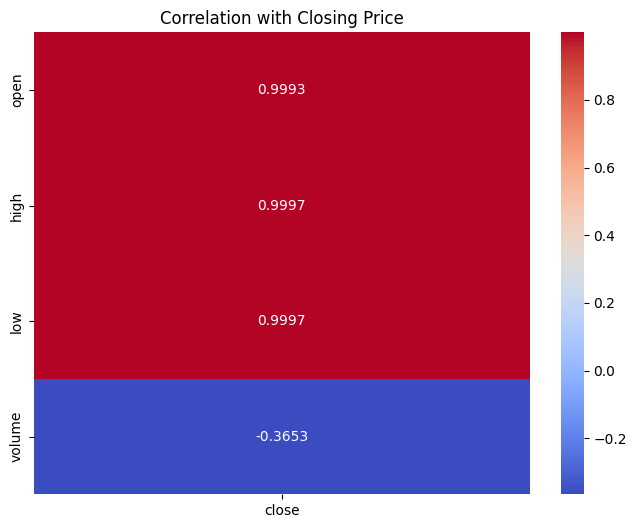

In [ ]:
# Select correlation with the target variable (closing price)
correlation_with_target = correlation_matrix['close'].drop('close')

# Plot heatmap showing only the correlation with closing price
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', fmt=".4f", cbar=True)
plt.title('Correlation with Closing Price')
plt.show()

* It appears that all the features, except volume, are highly correlated with the closing price, with correlation coefficients above 0.9.

* However, volume exhibits a negative correlation, indicating an inverse relationship. The correlation coefficient for volume (-0.3653) is notably lower than those for the other features, suggesting a weaker relationship compared to the rest.

 ## **Feature Engineering**

* Feature Selection is a crucial step in the data preparation process in machine learning and data analysis.

* The main goal of feature selection is to identify and retain the most informative features of a dataset, reducing the number of input variables and simplifying the model without sacrificing significant predictive power.

* Using feature selection helps in enhancing model interpretability, reducing computation time, and improving performance by eliminating irrelevant or redundant data.

**Approach to Feature Selection for Closing Stock Price Prediction**

In this analysis, the primary focus is on determining which features are most relevant to predicting the closing price of a stock. For this purpose, categorical variables such as time and name, which represent the time of the trade and the name of the stock, respectively, are excluded. These attributes are typically not directly related to the price movement and may not provide predictive value for this specific task.

Instead, the analysis concentrates on numerical features such as open, high, low, and volume. These features are chosen because they are inherently linked to market dynamics and can significantly influence the closing price:



* Open: The price at which a stock first trades upon the opening of an exchange on a trading day.

* High: The highest price at which a stock traded during the course of the trading day.

* Low: The lowest price at which a stock traded during the course of the trading day.

* Volume: The number of shares or contracts traded in a security or an entire market during a given period.

**Methodology for Feature Selection**


Filter methods:

 * Assess the relevance of features by looking at their statistical relationship with the target variable, independent of any model.

 * The SelectKBest function, when used with f_regression as the score function, exemplifies this approach.

 * It evaluates features based on their correlation with the target variable, scoring them accordingly, and selects the highest-scoring features, where k specifies the number of top features to select.

 * This method is recognized for its speed and effectiveness but does not account for interactions between features.

In [ ]:
# Split data into features and target
X = dataframe[['high', 'low', 'open', 'volume']]
y = dataframe['close']

# Initialize SelectKBest with f_regression, but do not set k yet as we want to evaluate all features
selector = SelectKBest(score_func=f_regression, k='all')

# Fit the selector to the data
X_new = selector.fit(X, y)

# Obtain the scores and p-values for each feature
scores = selector.scores_
p_values = selector.pvalues_

# Print scores and p-values
for i, feature in enumerate(X.columns):
    print(f"Feature: {feature}, Score: {scores[i]}, P-value: {p_values[i]}")

# Applying a p-value threshold to decide which features to keep
p_value_threshold = 0.05  # Commonly used threshold for statistical significance
selected_features = [feature for i, feature in enumerate(X.columns) if p_values[i] < p_value_threshold]

print("\nSelected features based on p-value threshold:", selected_features)

Feature: high, Score: 1894511.569467498, P-value: 0.0
Feature: low, Score: 2010891.5216481402, P-value: 0.0
Feature: open, Score: 958067.2471063616, P-value: 0.0
Feature: volume, Score: 193.5836170516579, P-value: 4.896700840869559e-41

Selected features based on p-value threshold: ['high', 'low', 'open', 'volume']


Based on the output from the SelectKBest feature selection method using f_regression, each of the features (high, low, open, volume) has demonstrated significant statistical relationships with the target variable, as indicated by the extremely low p-values. Here's a breakdown:

**Features High, Low, and Open:**

* These features, have shown exceptionally strong associations with the target variable (the closing price), with their p-values effectively at 0.0. This suggests that these price points during the trading day are crucial predictors of the closing price, likely because they directly encapsulate the day's trading dynamics.

**Feature Volume:**

* The trading volume has a lower score compared to the price features but still holds a statistically significant relationship with the close price, as evidenced by its p-value, which is practically zero (approximately 4.9×10^-41).

## **Train and Test Split**

In [ ]:
# Create a DataFrame with only selected features and necessary columns
filtered_data = dataframe[selected_features + ['close', 'date']]

# Split the data into training and testing sets based on date
training_data = filtered_data[filtered_data['date'].between('2013-01-01', '2017-12-31')]
testing_data = filtered_data[filtered_data['date'].between('2018-01-01', '2018-12-31')]

# Extract features and target variable for training
X_train = training_data[selected_features]
y_train = training_data['close']

# Extract features and target variable for testing
X_test = testing_data[selected_features]
y_test = testing_data['close']

The dataset has been strategically partitioned into training and testing sets to optimize the model’s performance and ensure its effectiveness in making future predictions. Here's how the data division has been structured:

* Training Set: This subset includes all data collected from before the year 2018. Utilizing historical data up to the end of 2017 allows the model to learn from a comprehensive range of past conditions, trends, and outcomes. This training approach ensures that the model is exposed to various market scenarios and patterns that occurred over several years, providing it with a robust foundation for learning.

* Testing Set: The data from the year 2018 constitutes the testing set. This set is crucial for validating the model's predictive power on new, unseen data. By exclusively using data from 2018 for testing, the model's performance can be assessed in a real-world scenario, simulating how well it can predict future stock prices based on the knowledge gained from historical data.

## **Linear Regression**

In [ ]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)

In [ ]:
mse_1 = mean_squared_error(y_test, y_pred_1)
r2_1 = r2_score(y_test, y_pred_1)

print("Mean Squared Error for Model 1:", mse_1)
print("R² Score for Model 1:", r2_1)

Mean Squared Error for Model 1: 0.6269625360902715
R² Score for Model 1: 0.9004905580928525


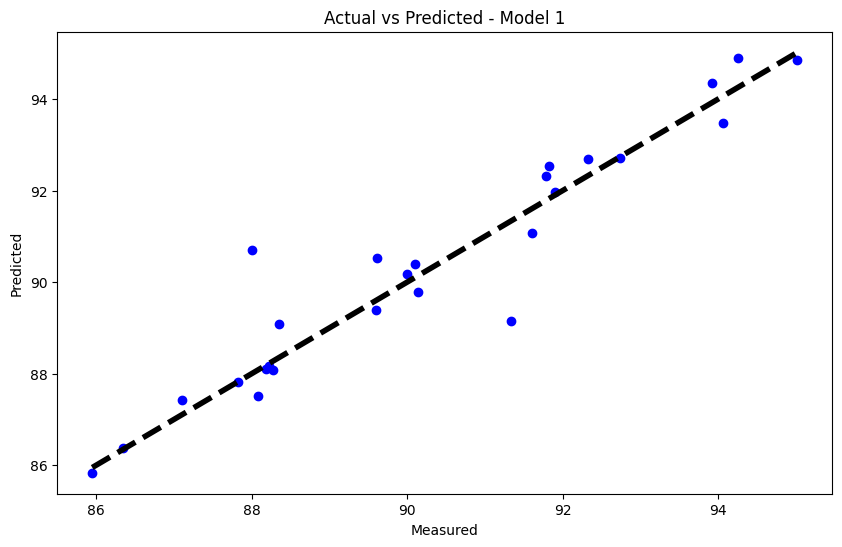

In [ ]:
# Plot the actual vs predicted values from Model 1 to visually assess model accuracy.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_1, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Model 1')
plt.show()

In [ ]:
# Display actual vs. predicted values for a subset of the test dataset
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
comparison.head(10)

,Actual,Predicted
1233,85.95,85.836190
1234,86.35,86.377848
1235,87.11,87.429788
1236,88.19,88.098391
1237,88.28,88.082292
1238,88.22,88.156533
1239,87.82,87.815070
1240,88.08,87.502733
1241,89.60,89.389108
1242,88.35,89.085244


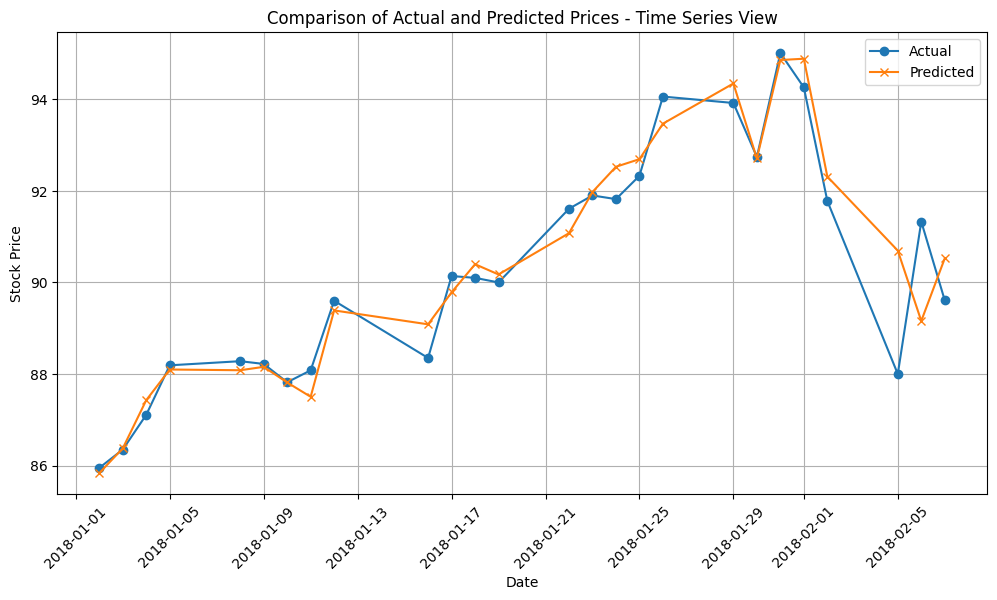

In [ ]:
# Plot a line graph for a sequential view
plt.figure(figsize=(12, 6))
plt.plot(testing_data['date'], y_test, label='Actual', marker='o')  # Using date from the DataFrame
plt.plot(testing_data['date'], y_pred_1, label='Predicted', marker='x')
plt.title('Comparison of Actual and Predicted Prices - Time Series View')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Prepare cross-validation (k=10 folds)
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Perform cross-validation
cv_scores = cross_val_score(model_1, X, y, scoring='neg_mean_squared_error', cv=kf)

# Compute the average MSE from cross-validation
mean_cv_mse = np.mean(cv_scores)
print("Mean MSE from Cross-Validation for Model 1:", -mean_cv_mse)

Mean MSE from Cross-Validation for Model 1: 0.06982508095690508


*  A mean MSE of approximately 0.0698 indicates that, on average, the squared difference between the predicted and actual closing prices is 0.0698.

* This value is relatively low, suggesting that Model 1 has a reasonably accurate fit to the data.

## **Random Forest**

In [ ]:
model_2 = RandomForestRegressor(random_state=42)
model_2.fit(X_train, y_train)

y_pred_2 = model_2.predict(X_test)

In [ ]:
mse_2 = mean_squared_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)
print("Mean Squared Error for Random Forest Model:", mse_2)
print("R² Score for Random Forest Model:", r2_2)

Mean Squared Error for Random Forest Model: 22.02113478923048
R² Score for Random Forest Model: -2.495122446555379


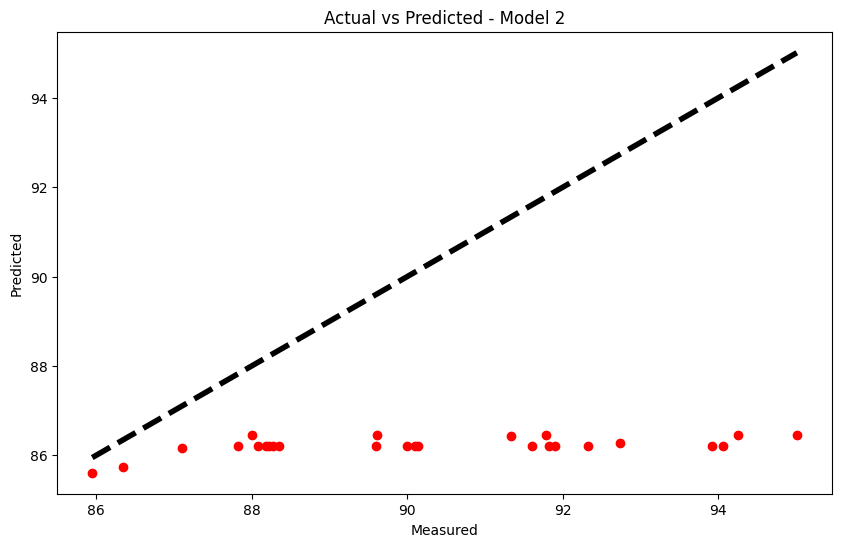

In [ ]:
# Plot the actual vs predicted values from Model 2 to visually assess model accuracy.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_2, color='red')  # Use red color for differentiation
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted - Model 2')
plt.show()

In [ ]:
# Display actual vs. predicted values for a subset of the test dataset
comparison2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2})
comparison2.head(10)

,Actual,Predicted
1233,85.95,85.6108
1234,86.35,85.7424
1235,87.11,86.1677
1236,88.19,86.2167
1237,88.28,86.2167
1238,88.22,86.2042
1239,87.82,86.2042
1240,88.08,86.2038
1241,89.60,86.2167
1242,88.35,86.2167


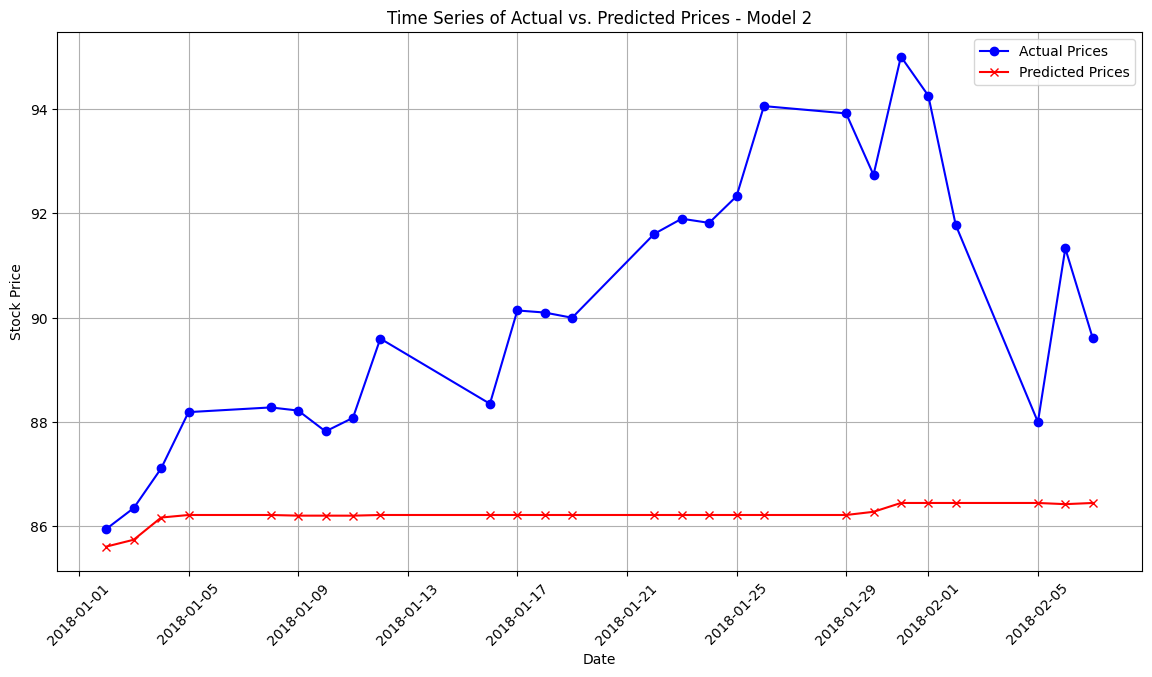

In [ ]:
# Assuming 'date' is a column and formatted as datetime in your testing_data DataFrame
plt.figure(figsize=(14, 7))  # Set the size of the plot

# Plotting the actual values
plt.plot(testing_data['date'], y_test, label='Actual Prices', marker='o', color='blue')

# Plotting the predicted values
plt.plot(testing_data['date'], y_pred_2, label='Predicted Prices', marker='x', color='red')

# Adding plot title, labels, and legend
plt.title('Time Series of Actual vs. Predicted Prices - Model 2')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)  # Adds a grid for easier readability

# Rotating date labels to prevent overlap
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Prepare cross-validation (k=10 folds)
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Perform cross-validation
cv_scores_2 = cross_val_score(model_2, X, y, scoring='neg_mean_squared_error', cv=kf)

# Compute the average MSE from cross-validation
mean_cv_mse_2 = np.mean(cv_scores_2)
print("Mean MSE from Cross-Validation for Random Forest Model:", -mean_cv_mse_2)


Mean MSE from Cross-Validation for Random Forest Model: 0.12948568722044057


* Recall that Model 1's MSE from cross-validation was approximately 0.0698. If Model 1's MSE is lower than the Random Forest's MSE, this might indicate that the simpler Model 1 is performing better.